<b>Loading the Data Sets From the Folder</b>

In [187]:
import numpy as np
import pandas as pd

train = pd.read_csv(r'/Users/sinegami777/Desktop/ML_Project/walmart-recruiting-store-sales-forecasting/train.csv')
test = pd.read_csv(r'/Users/sinegami777/Desktop/ML_Project/walmart-recruiting-store-sales-forecasting/test.csv')
feature = pd.read_csv(r'/Users/sinegami777/Desktop/ML_Project/walmart-recruiting-store-sales-forecasting/features.csv')
store = pd.read_csv(r'/Users/sinegami777/Desktop/ML_Project/walmart-recruiting-store-sales-forecasting/stores.csv')
train_ds = pd.DataFrame(data = train)
test_ds = pd.DataFrame(data = test)
store_ds = pd.DataFrame(data = store)
feat_ds = pd.DataFrame(data = feature)

In [188]:
print(train.describe()) 
print(test.describe())

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000
               Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000




<b>Merging the Train and Test Dataset with Stores and Features Dataset</b>



In [189]:
train_ds = train_ds.merge(store_ds, how='left').merge(feat_ds, how='left')
test_ds = test_ds.merge(store_ds, how='left').merge(feat_ds, how='left')
print("Total Rows and Columns")
print('Training DS: ', train_ds.shape)
print('Testing DS: ', test_ds.shape)
print(train_ds.columns, test_ds.columns)

Total Rows and Columns
Training DS:  (421570, 16)
Testing DS:  (115064, 15)
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object') Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


In [190]:
print('NAN Train DS: ', train_ds.isna().sum().sum())
print('NAN Test DS: ', test_ds.isna().sum().sum())


NAN Train DS:  1422431
NAN Test DS:  127817


<b>Analyzing the Dataframes for NA Values and percentage of the same </b>

In [191]:
#determining % of NAN values for the MarkDown COLUMNS....
list_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for mcols in list_cols:
    print(mcols, train_ds[mcols].isna().sum()/len(train_ds))

MarkDown1 0.6425718148824632
MarkDown2 0.7361102545247528
MarkDown3 0.6748084541120098
MarkDown4 0.6798467632896079
MarkDown5 0.6407903788220224


In [192]:
# As the percentage for NaN values exceeds 60% and as per description, they are anonymous sets, 
# so it can be deduced that it would not have a strong correlation against Weekly_Sales Column, hence should be dropped.
#Droping the columns from DS due to above observation.

train_ds = train_ds.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
test_ds = test_ds.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
train_ds


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667


In [193]:
# print(dataset.dtypes, dataset.isnull().sum())
print('Validating the Testing Dataset----------->')
for ncols in test_ds.columns:
    print((ncols,test_ds[ncols].isnull().sum(),test_ds[ncols].dtypes))
print('Validating the Training Dataset----------->')
for ncols in train_ds.columns:
    print((ncols,train_ds[ncols].isnull().sum(),train_ds[ncols].dtypes))

Validating the Testing Dataset----------->
('Store', 0, dtype('int64'))
('Dept', 0, dtype('int64'))
('Date', 0, dtype('O'))
('IsHoliday', 0, dtype('bool'))
('Type', 0, dtype('O'))
('Size', 0, dtype('int64'))
('Temperature', 0, dtype('float64'))
('Fuel_Price', 0, dtype('float64'))
('CPI', 38162, dtype('float64'))
('Unemployment', 38162, dtype('float64'))
Validating the Training Dataset----------->
('Store', 0, dtype('int64'))
('Dept', 0, dtype('int64'))
('Date', 0, dtype('O'))
('Weekly_Sales', 0, dtype('float64'))
('IsHoliday', 0, dtype('bool'))
('Type', 0, dtype('O'))
('Size', 0, dtype('int64'))
('Temperature', 0, dtype('float64'))
('Fuel_Price', 0, dtype('float64'))
('CPI', 0, dtype('float64'))
('Unemployment', 0, dtype('float64'))


<b>Plotting the Correlation of Traning and Testing dataset</b>

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

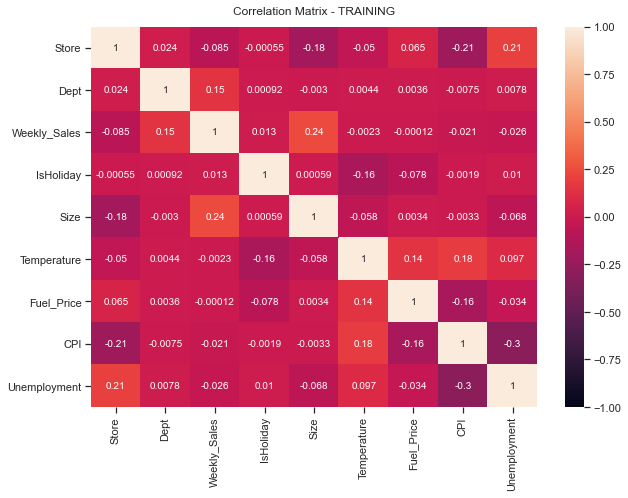

In [195]:
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(train_ds.corr(), vmin=-1, vmax=1, annot=True,annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - TRAINING', fontdict={'fontsize':12}, pad=12);

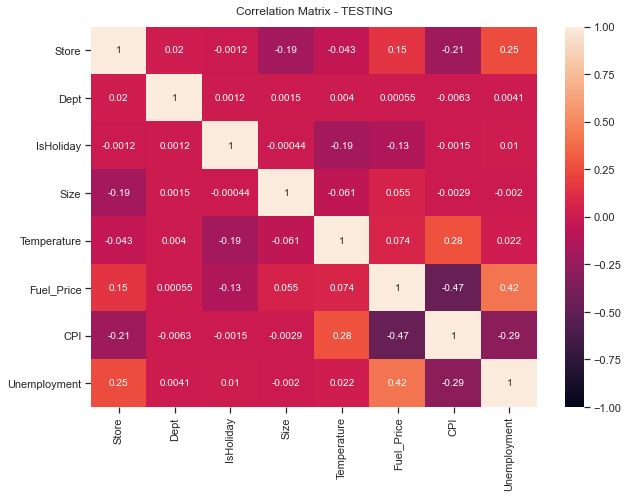

In [196]:
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(test_ds.corr(), vmin=-1, vmax=1, annot=True,annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - TESTING', fontdict={'fontsize':12}, pad=12);

<b>Data Processing and Cleaning</b>

In [197]:
# From above it can be found that 
# Fuel_Price, Unemployment and CPI have negative correlation, hence we can drop.
train_ds = train_ds.drop(columns=["CPI", "Fuel_Price", 'Unemployment'])
train_ds.head(5)
test_ds = test_ds.drop(columns=["CPI", "Fuel_Price", 'Unemployment'])
test_ds.head(5)


,Store,Dept,Date,IsHoliday,Type,Size,Temperature
0,1,1,2012-11-02,False,A,151315,55.32
1,1,1,2012-11-09,False,A,151315,61.24
2,1,1,2012-11-16,False,A,151315,52.92
3,1,1,2012-11-23,True,A,151315,56.23
4,1,1,2012-11-30,False,A,151315,52.34


<b>Adding the Holiday Weeks as defined</b>

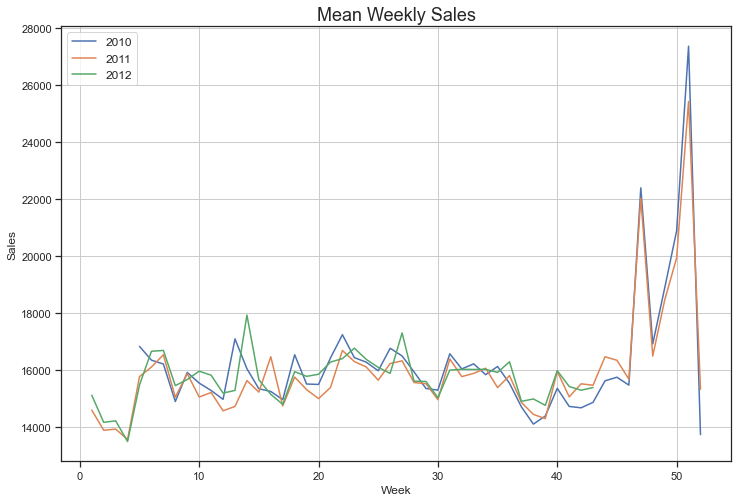

In [198]:
#Creating new Year and Holiday_Type columns from the Date.

train_ds['Year'] = pd.to_datetime(train_ds.Date).dt.year
train_ds['Week'] = pd.to_datetime(train_ds.Date).dt.isocalendar().week
test_ds['Year'] = pd.to_datetime(test_ds.Date).dt.year
test_ds['Week'] = pd.to_datetime(test_ds.Date).dt.isocalendar().week
# For different WEEK Values Holiday Type is defined as below
# 6 Super Bowl
# 36 Labor Day
# 47 Thanksgiving
# 52 Christmas

# Checking Plots for Year wise and Week wise Weekly_Sales
ws_2010 = train_ds[train_ds.Year==2010].Weekly_Sales.groupby(train_ds.Week).mean()
ws_2011 = train_ds[train_ds.Year==2011].Weekly_Sales.groupby(train_ds.Week).mean()
ws_2012 = train_ds[train_ds.Year==2012].Weekly_Sales.groupby(train_ds.Week).mean()
plt.figure(figsize=(12,8))
sns.lineplot(ws_2010.index, ws_2010.values)
sns.lineplot(ws_2011.index, ws_2011.values)
sns.lineplot(ws_2012.index, ws_2012.values)
plt.grid()
plt.legend(['2010', '2011', '2012'], fontsize=12)
plt.title('Mean Weekly Sales', fontsize=18)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Week', fontsize=12)
plt.show()


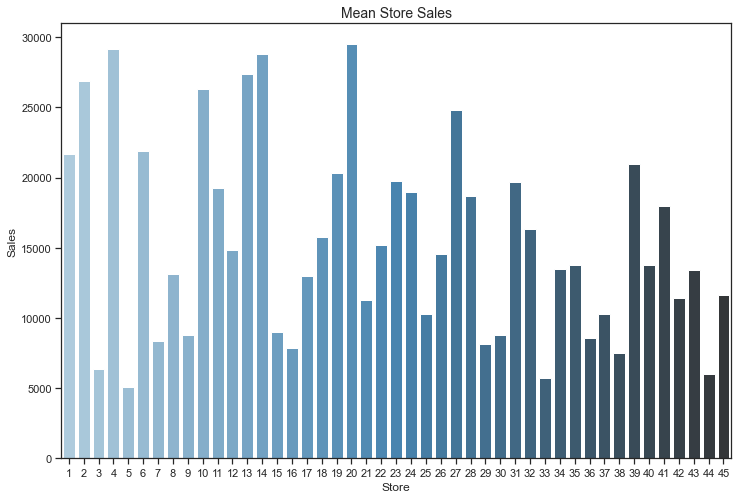

In [200]:
store_sales = train_ds.Weekly_Sales.groupby(train_ds.Store).mean()
plt.figure(figsize=(12,8))
sns.barplot(store_sales.index, store_sales.values, palette="Blues_d")
plt.title('Mean Store Sales', fontsize=14)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Store', fontsize=12)
plt.show()


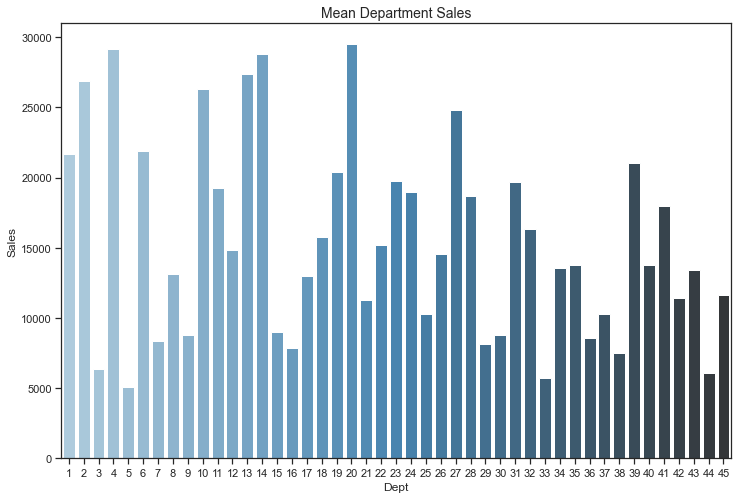

In [201]:
dept_sales = train_ds.Weekly_Sales.groupby(train_ds.Store).mean()
plt.figure(figsize=(12,8))
sns.barplot(dept_sales.index, dept_sales.values,palette="Blues_d")
plt.title('Mean Department Sales', fontsize=14)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Dept', fontsize=12)
plt.show()

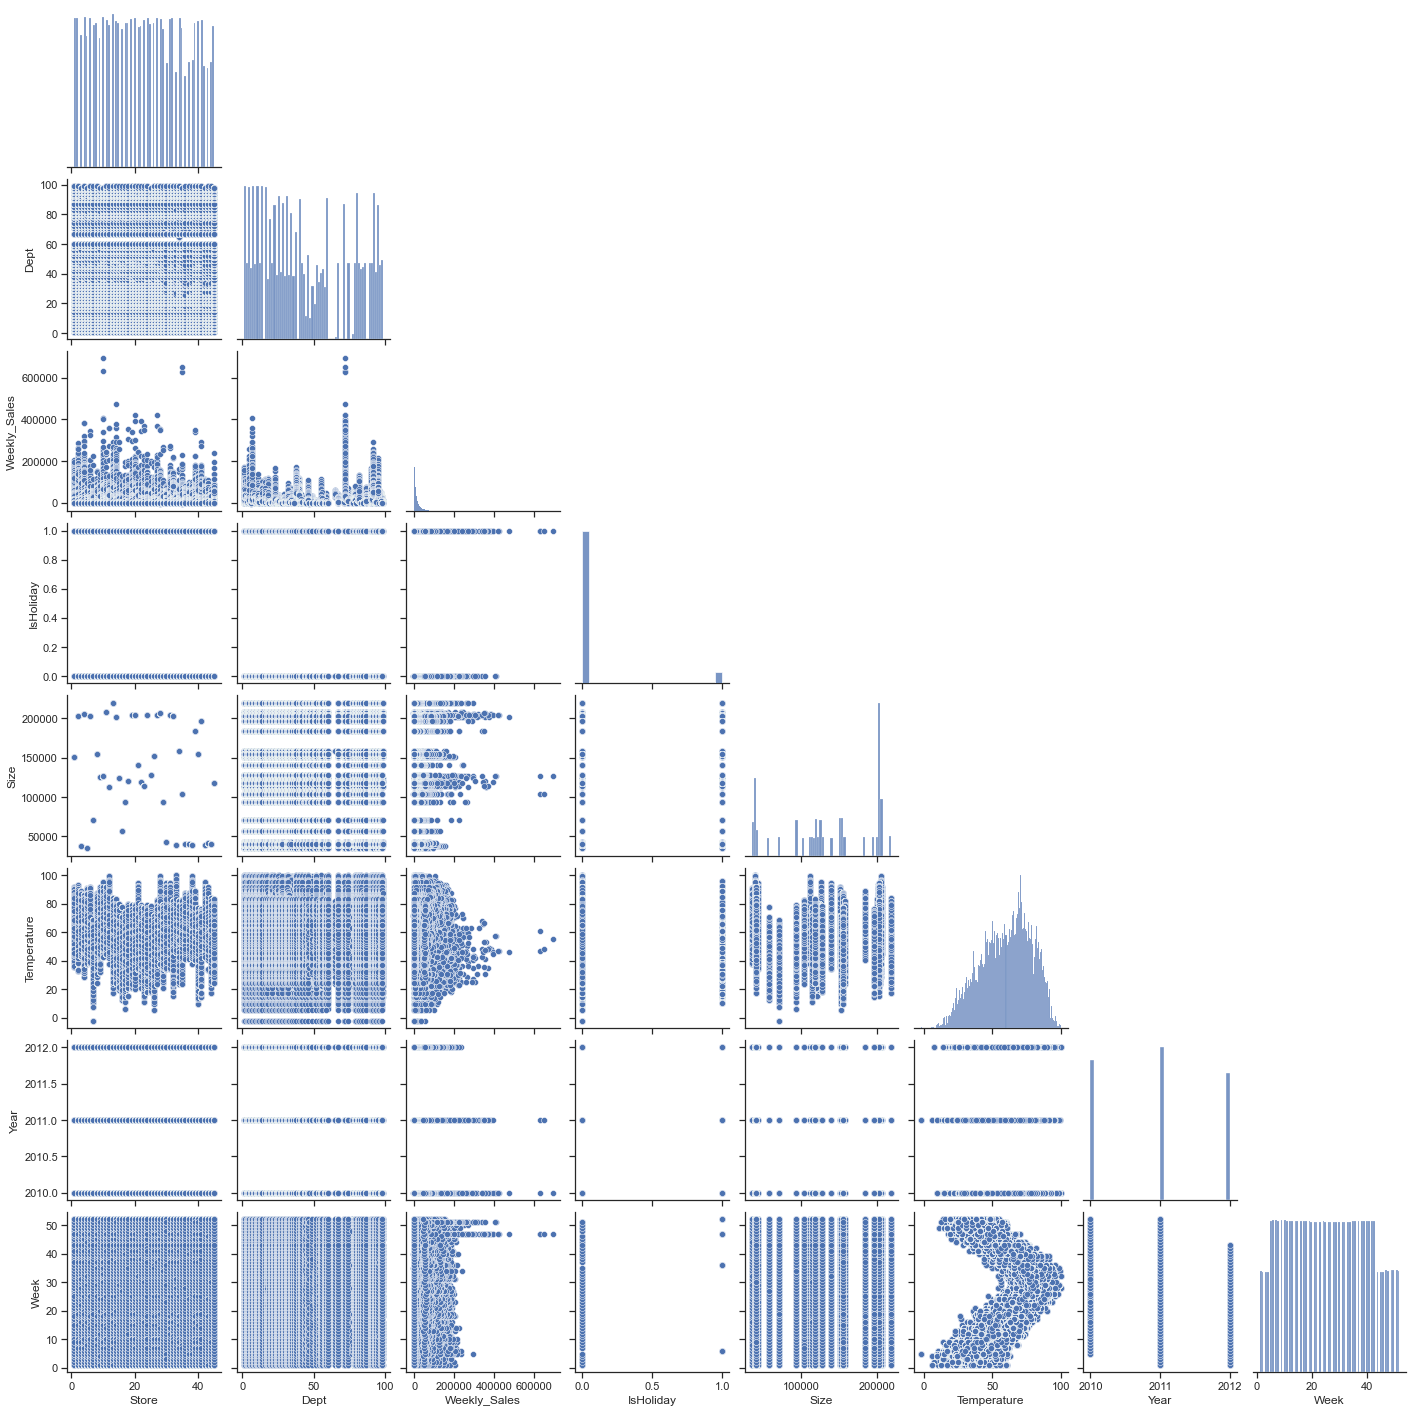

In [183]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(train_ds,corner=True)
plt.show()

<b>Data Discreetization for the Model Application</b>

In [202]:
#1. train_ds processing and discreetizing 

# Removing the target column Weekly_Sales from the train_ds
train_target = train_ds['Weekly_Sales']
train_ds = train_ds.drop(columns=['Weekly_Sales'])
train_ds

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Year,Week
0,1,1,2010-02-05,False,A,151315,42.31,2010,5
1,1,1,2010-02-12,True,A,151315,38.51,2010,6
2,1,1,2010-02-19,False,A,151315,39.93,2010,7
3,1,1,2010-02-26,False,A,151315,46.63,2010,8
4,1,1,2010-03-05,False,A,151315,46.50,2010,9
...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,False,B,118221,64.88,2012,39
421566,45,98,2012-10-05,False,B,118221,64.89,2012,40
421567,45,98,2012-10-12,False,B,118221,54.47,2012,41
421568,45,98,2012-10-19,False,B,118221,56.47,2012,42


In [203]:
#Scalling the Values for regression model
ls = temp_ds[(temp_ds.Type == "A")].index.to_list()
temp_ds.loc[ls, "Type"] = "1"
ls = temp_ds[(temp_ds.Type == "B")].index.to_list()
temp_ds.loc[ls, "Type"] = "2"
ls = temp_ds[(temp_ds.Type == "C")].index.to_list()
temp_ds.loc[ls, "Type"] = "3"
#Scalling the Values for regression model
ls = test_ds[(test_ds.Type == "A")].index.to_list()
test_ds.loc[ls, "Type"] = "1"
ls = test_ds[(test_ds.Type == "B")].index.to_list()
test_ds.loc[ls, "Type"] = "2"
ls = test_ds[(test_ds.Type == "C")].index.to_list()
test_ds.loc[ls, "Type"] = "3"

In [204]:
train_ds = temp_ds
train_ds.Type.unique()

array(['1', '2', '3'], dtype=object)

In [205]:
train_ds = train_ds.drop(columns=['Temperature', 'Date'])
test_ds = test_ds.drop(columns=['Temperature', 'Date'])
train_ds

,Store,Dept,IsHoliday,Type,Size,Year,Week
0,1,1,False,1,151315,2010,5
1,1,1,True,1,151315,2010,6
2,1,1,False,1,151315,2010,7
3,1,1,False,1,151315,2010,8
4,1,1,False,1,151315,2010,9
...,...,...,...,...,...,...,...
421565,45,98,False,2,118221,2012,39
421566,45,98,False,2,118221,2012,40
421567,45,98,False,2,118221,2012,41
421568,45,98,False,2,118221,2012,42


In [206]:
test_ds

,Store,Dept,IsHoliday,Type,Size,Year,Week
0,1,1,False,1,151315,2012,44
1,1,1,False,1,151315,2012,45
2,1,1,False,1,151315,2012,46
3,1,1,True,1,151315,2012,47
4,1,1,False,1,151315,2012,48
...,...,...,...,...,...,...,...
115059,45,98,False,2,118221,2013,26
115060,45,98,False,2,118221,2013,27
115061,45,98,False,2,118221,2013,28
115062,45,98,False,2,118221,2013,29


<b>Applying the Random Forest Regressor with n_estimators=58, max_depth=27, max_features=6</b>

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore") # ignoring annoying warnings

#Performing a 70-30 Split on the traning dataset
X_train, X_test, y_train, y_test = train_test_split(df, train_target,test_size=0.3, random_state=42)
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

X_train  (295099, 7)
X_test  (126471, 7)
y_train  (295099,)
y_test  (126471,)


In [209]:
RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [210]:
#Defining the Custome Weighted Mean Error for the predicetd and actual values against IsHoliday as factor

def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [211]:
WMAE(df,y_test,y_pred)

478.79

In [212]:
test_ds

,Store,Dept,IsHoliday,Type,Size,Year,Week
0,1,1,False,1,151315,2012,44
1,1,1,False,1,151315,2012,45
2,1,1,False,1,151315,2012,46
3,1,1,True,1,151315,2012,47
4,1,1,False,1,151315,2012,48
...,...,...,...,...,...,...,...
115059,45,98,False,2,118221,2013,26
115060,45,98,False,2,118221,2013,27
115061,45,98,False,2,118221,2013,28
115062,45,98,False,2,118221,2013,29


In [214]:
#Predicting for the test_ds with the above model

y_pred = RF.predict(test_ds)
y_pred

array([30912.10060632, 19562.96824138, 19659.56528448, ...,
         699.83613506,   767.48239368,   678.62683908])

<b>Plotting the Predicted Values (Sales) as per Hoilday week</b>

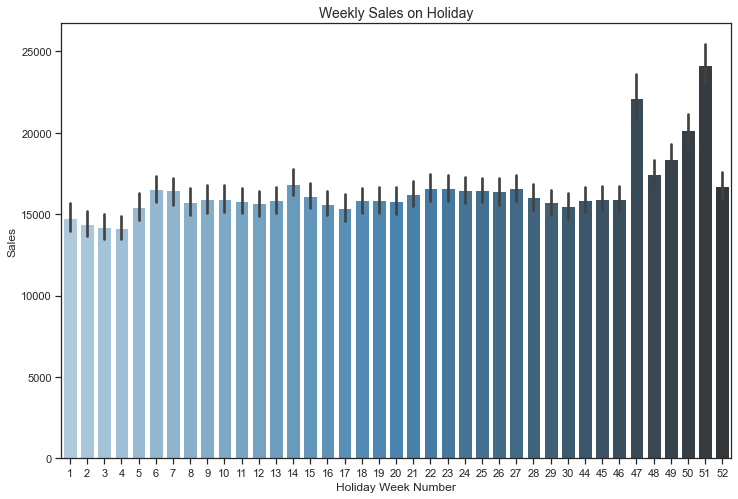

In [215]:
plt.figure(figsize=(12,8))
sns.barplot(test_ds.Week, y_pred, palette="Blues_d")
plt.title('Weekly Sales on Holiday', fontsize=14)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Holiday Week Number', fontsize=12)
plt.show()